# Synopsis

This code generates the g2 (ROI2) and tau vs. Q figure (water) for the manuscript

## Initialize

In [1]:

import numpy as np
from numpy import sqrt, sin, cos, pi, exp
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import h5py  
from scipy.optimize import curve_fit
import scipy.integrate as integrate
from xpcs_viewer import XpcsFile as xf


## Read data

In [2]:

fn_path = '../Reduced_Data/'
Water = xf('J058_Water_XPCS_Trim.hdf', cwd = fn_path)


## Fit g2 for water data

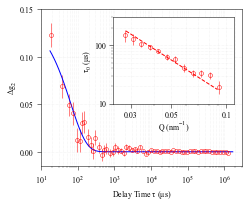

In [12]:

contrast = 0.14
exp_arg = 1

LB_list_g2 = [contrast, 1e-6, exp_arg, 0.95]
UB_list_g2 = [contrast, 1, exp_arg, 1.05]

_ = Water.fit_g2(q_range=[0, 0.01],t_range=[1e-8, 1e1], bounds=[LB_list_g2,UB_list_g2],
    fit_flag=[False, True, False, True])

g2_fit_line_Water = _["fit_line"]
# g2_fit_line stores fitted g2 at different q's into a list of dictionaries. 
# Each dictionary contains two keys, fit_x and fit_y.
# fit_x is a 2D numpy array that corresponds to the time axis at that q;
# fit_y is a 2D numpy array that corresponds to the fitted g2 values at that q;

# g2_fit_coeff is a 3D numpy array.
# i is the q ROI index;
# j=0 for fit values, j=1 for errors;
# k=0,1,2,3 to select fitting parameters
g2_fit_coeff_Water = _["fit_val"]

tauq_power = -2
LB_list_tauQ = [1e-12, tauq_power]
UB_list_tauQ = [1e-3, tauq_power]

_ = Water.fit_tauq(q_range=[0, 0.01], bounds=[LB_list_tauQ, UB_list_tauQ], fit_flag=[True, False])
tauq_fit_val_Water = _["tauq_fit_val"]
tauq_fit_line_Water = _["tauq_fit_line"]
tauq_q_Water = _["tauq_q"]
tauq_tau_Water = _["tauq_tau"]
tauq_tau_err_Water = _["tauq_tau_err"]

scale = 1
width = 3.6*scale
font_size = 8*scale
line_width = 0.5*scale
marker_size = 4*scale
tick_length_major = 4*scale
tick_length_minor = 2*scale

dim=1

###### Set up canvas ######
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(width, 0.8*width))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['axes.linewidth'] = line_width

###### Plot g2 ######
ax.errorbar(Water.t_el[:-1], Water.g2[:-1,dim]-g2_fit_coeff_Water[dim,0,3], yerr=Water.g2_err[:-1,dim], 
            fmt='ro', markersize=marker_size, linewidth=line_width, markeredgewidth=line_width,
            markerfacecolor='none')
ax.plot(g2_fit_line_Water[dim]["fit_x"][10:-10], g2_fit_line_Water[dim]["fit_y"][10:-10] \
        -g2_fit_coeff_Water[dim,0,3], 'b-', linewidth=2*line_width)

###### Set up ticks, labels and strokes ######
ax.grid(color='k', linestyle=':', linewidth=line_width, alpha=0.1, which='both')
ax.tick_params('both', length=tick_length_major, width=line_width, which='major', labelsize=font_size)
ax.tick_params('x', length=tick_length_minor, width=0.5*line_width, which='minor',
              labelleft=False, labelbottom=False)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(line_width)

ax.set_xscale('log')
ax.set_xlim(1e-5, 3)
ax.set_xticks([1e-5,1e-4,1e-3,1e-2,1e-1,1e0])
ax.set_xticklabels(['10$^\mathdefault{1}$',
                    '10$^\mathdefault{2}$',
                    '10$^\mathdefault{3}$',
                    '10$^\mathdefault{4}$',
                    '10$^\mathdefault{5}$',
                    '10$^\mathdefault{6}$'],
                    fontsize = font_size)
ax.set_xlabel('Delay Time $\mathdefault{\u03C4}$ ($\mathdefault{\mu}$s)', 
              fontsize=font_size, labelpad=0.2*font_size)

ax.set_yticks([0,0.05,0.1,0.15])
ax.set_ylim(-0.015, 0.15)
ax.set_yticks([0, 0.05, 0.1, 0.15])
ax.set_ylabel('$\mathdefault{\Delta}$g$\mathdefault{_2}$', 
              fontsize=font_size, labelpad=0.05*font_size)

###### Plot inset (tau vs. Q) ######
axins = inset_axes(ax, width="60%", height="55%", loc=1, borderpad=0.1*font_size)
axins.errorbar(tauq_q_Water, tauq_tau_Water, tauq_tau_err_Water, fmt='ro', markeredgewidth=line_width,
               linewidth=line_width, markersize=marker_size, markerfacecolor='none')
axins.plot(tauq_fit_line_Water["fit_x"][10:-10], tauq_fit_line_Water["fit_y"][10:-10], 'r--', 
           linewidth=2*line_width)
for axis in ['top','bottom','left','right']:
    axins.spines[axis].set_linewidth(line_width)

###### Set up ticks, labels and strokes for the inset ######
axins.grid(color='k', linestyle=':', linewidth=line_width, alpha=0.1, which='both')
axins.tick_params('both', length=tick_length_major, width=line_width, which='major', labelsize=font_size)
axins.tick_params('both', length=tick_length_minor, width=0.5*line_width, which='minor', 
               labelleft=False, labelbottom=False)

axins.set_xscale('log')
axins.set_xlim(2.4e-3, 1.1e-2)
axins.set_xticks([3e-3, 5e-3, 1e-2])
axins.set_xticklabels([0.03, 0.05, 0.1], fontsize=font_size)
axins.set_xlabel('Q (nm$\mathdefault{^{-1}}$)', fontsize=font_size, labelpad=0.05*font_size)

axins.set_yscale('log')
axins.set_ylim(1e-5, 3e-4)
axins.set_yticks([1e-5, 1e-4])
axins.set_yticklabels([10, 100], fontsize=font_size)
axins.set_ylabel('$\mathdefault{\u03C4_0}$ ($\mathdefault{\mu}$s)', 
              fontsize=font_size, labelpad=0.05*font_size)

# axins.set_xscale('log')
# axins.set_xticks([3e-3, 4e-3, 5e-3])
# axins.set_xticklabels([0.03, 0.04, 0.05], fontsize=font_size)
# axins.set_xlabel('Q (nm$\mathdefault{^{-1}}$)', fontsize=font_size, labelpad=0.05*font_size)

# axins.set_ylim(1e-5, 2e-4)
# axins.set_yscale('log')
# axins.set_yticks([5e-5, 1e-4, 2e-4])
# axins.set_yticklabels([50, 100, 200], fontsize=font_size)
# axins.set_ylabel('$\mathdefault{\u03C4_0}$ ($\mathdefault{\mu}$s)', fontsize=font_size,
#                 labelpad=0.05*font_size)

###### Save image ######
plt.savefig('g2_tauQ_Water.pdf', dpi=600, format='pdf', 
            facecolor='w', edgecolor='w', transparent=False, bbox_inches='tight')


In [14]:

print((tauq_q_Water*10))
print(2*3.14/(tauq_q_Water*10))
print(Water.t_el[:-1])

[0.028 0.031 0.034 0.038 0.042 0.047 0.053 0.059 0.065 0.073 0.081 0.091]
[226.341 205.385 184.66  165.654 148.557 133.211 119.459 107.138  96.078
  86.155  77.348  69.334]
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.001 0.001 0.001 0.001 0.001 0.001 0.002 0.002 0.002 0.002
 0.003 0.004 0.004 0.005 0.006 0.007 0.009 0.01  0.012 0.015 0.017 0.019
 0.024 0.029 0.034 0.039 0.049 0.058 0.068 0.078 0.097 0.117 0.136 0.156
 0.195 0.233 0.272 0.311 0.389 0.467 0.545 0.623 0.778 0.934 1.09  1.245]


In [15]:
100000/52000.0

1.9230769230769231